**Plot remaining main figure panels**

In [1]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(ggsci)
library(reshape2)
source('./ABCA7lof2/plotting.r')

Linking to ImageMagick 7.1.1.11
Enabled features: cairo, fontconfig, freetype, fftw, rsvg, webp, x11
Disabled features: ghostscript, heic, lcms, pango, raw

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs,

In [10]:
cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')
colors = readRDS('./processed_data//Cell_group_colors.rds')

<u>**Figure 1**</u>
<a name="F1"></a>

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


png 
  2

png 
  2

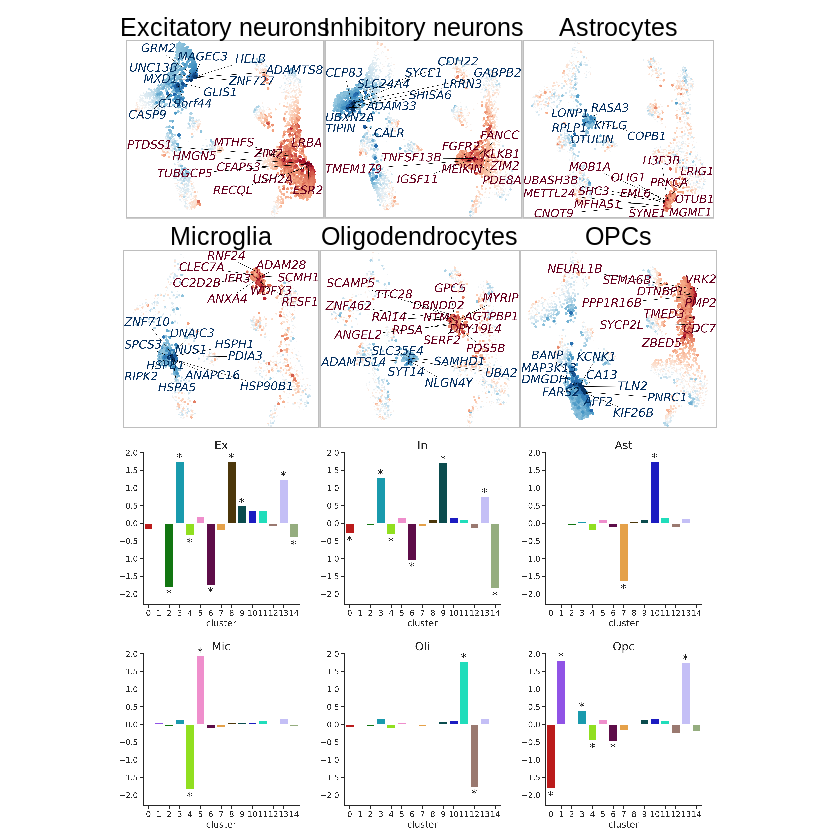

In [3]:
colData = read.csv('./processed_data/single_cell/colData.csv')
coords = colData[,c('x', 'y', 'ABCA7LoF', 'projid', 'leiden_clusters', 'annotations2', 'gaussian_liklihood')]
coords$ABCA7LoF = ifelse(coords$ABCA7LoF==1, 'LoF', 'Con')
coords['alpha'] = (coords$gaussian_liklihood-min(coords$gaussian_liklihood))/max(coords$gaussian_liklihood-min(coords$gaussian_liklihood))
size=2

# plot cells

png('./pdf_figures/Figure_1_cells.png', res=300, width=5000, height=5000)
plot_coords_by_grp(coords, 'x', 'y', 'annotations2', 'alpha', colors, .05)
dev.off()

# get gene plots

s=15
b="10x10"
ex_u = image_ggplot(image_border(image_trim((image_read('./pdf_figures/Figure_1_Exumap.png'))),  "grey", b))+ ggtitle('Excitatory neurons') + theme(plot.title = element_text(hjust = 0.5, size=s))
in_u = image_ggplot(image_border(image_trim((image_read('./pdf_figures/Figure_1_Inumap.png'))),  "grey", b))+ ggtitle('Inhibitory neurons') + theme(plot.title = element_text(hjust = 0.5, size=s))
ast_u = image_ggplot(image_border(image_trim((image_read('./pdf_figures/Figure_1_Astumap.png'))),  "grey", b))+ ggtitle('Astrocytes') + theme(plot.title = element_text(hjust = 0.5, size=s))
mic_u = image_ggplot(image_border(image_trim((image_read('./pdf_figures/Figure_1_Micumap.png'))),  "grey", b))+ ggtitle('Microglia') + theme(plot.title = element_text(hjust = 0.5, size=s))
oli_u = image_ggplot(image_border(image_trim((image_read('./pdf_figures/Figure_1_Oliumap.png'))),  "grey", b))+ ggtitle('Oligodendrocytes') + theme(plot.title = element_text(hjust = 0.5, size=s))
opc_u = image_ggplot(image_border(image_trim((image_read('./pdf_figures/Figure_1_Opcumap.png'))),  "grey", b))+ ggtitle('OPCs') + theme(plot.title = element_text(hjust = 0.5, size=s))

# get bars
ex_b = image_ggplot((image_read_pdf('./pdf_figures/Figure_1_cluster_barsEx.pdf')))
in_b = image_ggplot((image_read_pdf('./pdf_figures/Figure_1_cluster_barsIn.pdf')))
ast_b = image_ggplot((image_read_pdf('./pdf_figures/Figure_1_cluster_barsAst.pdf')))
mic_b = image_ggplot((image_read_pdf('./pdf_figures/Figure_1_cluster_barsMic.pdf')))
oli_b = image_ggplot((image_read_pdf('./pdf_figures/Figure_1_cluster_barsOli.pdf')))
opc_b = image_ggplot((image_read_pdf('./pdf_figures/Figure_1_cluster_barsOpc.pdf')))

# save plot
row3 = ((ex_b|in_b|ast_b)/(mic_b|oli_b|opc_b))
row2 = ((ex_u | in_u | ast_u) / (mic_u |oli_u | opc_u))
col1 = (row2/row3)+plot_layout(heights=c(2,2,4.5))

col1

pdf('./pdf_figures/Figure_1.pdf', width=15, height=15)
col1
dev.off()

<u>**Figure 2**</u>
<a name="F2"></a>

In [3]:
# plot ABCA7 expression
sce = readRDS('./processed_data/single_cell/sce.rds')

df = as.data.frame(cbind(sce$annotations2, sce$gaussian_liklihood, sce$x, sce$y, logcounts(sce)['ABCA7',]))

colnames(df) = c('anno', 'gaus', 'x', 'y', 'ABCA7')
df$x = as.numeric(df$x)
df$y = as.numeric(df$y)
df$ABCA7 = as.numeric(df$ABCA7)
df$gaus = as.numeric(df$gaus)

df$alpha = (df$gaus-min(df$gaus))/max(df$gaus-min(df$gaus))
df$norm = log(df$ABCA7+1e-10)

options(repr.plot.width=10, repr.plot.height=10)

png('./pdf_figures/Figure_2_cells.png', res=300, width=5000, height=5000)
plot_coords_by_gene(df, 'x', 'y', 'norm', 'alpha', low='white', high='red')
dev.off()

In [51]:
# plot detection rate
all_data = readRDS('./processed_data/single_cell//stats_input_data_0825.rds')
x = all_data$det.rate.celltype['ABCA7',]
x = x[order(-1*x)]
x = as.data.frame(x)
x$cell = factor(rownames(x), levels = rownames(x))

options(repr.plot.width=3, repr.plot.height=3)

pdf('./pdf_figures/Figure_2_detection.pdf', width=3, height=3)
ggplot(data=x, aes(x=cell, y=x, fill = cell)) +
  geom_bar(stat="identity") + theme_classic() + scale_fill_manual(values = colors[x$cell]) + ylab('fraction of cells where counts > 0') + xlab('')
dev.off()


png 
  2

In [19]:
# plot fgsea results for ex neurons
fgsea = readRDS('./processed_data/for_plotting//fgsea_out_0825.rds')
plot_top_paths = function(fgsea, celltype, name, colors){
    temp = fgsea[[celltype]]
    temp = temp[temp$pval<0.025,]
    temp = as.data.frame(temp)
    rownames(temp) = unlist(lapply(temp$pathway, function(x) strsplit(x, ' WP')[[1]][1]))
    temp$genes = unlist(lapply(temp[,'leadingEdge'], function(x) paste(x, collapse = ', ')))
    temp$score = sign(temp$NES) * -log10(temp$pval)
    temp = rbind(temp[rownames(temp)[order((temp$score),decreasing=TRUE)[1:5]],],temp[rownames(temp)[order((temp$score),decreasing=FALSE)[1:5]],])
    temp$pathway = rownames(temp)
    temp = temp[unlist(lapply(temp$leadingEdge, function(x) length(x)))>3,]

    temp$pathway = factor(temp$pathway, levels=temp$pathway[order(temp$score,decreasing=FALSE)])
    P = ggplot(data=temp, aes(x=score, y=pathway))+
      geom_bar(stat="identity", fill=colors[celltype]) +theme_classic()+
    geom_text(aes(label = genes,x=min(temp$score), hjust = 0, fontface="italic"),color='black')+
    theme(legend.position = "bottom", strip.text.x = element_blank() )+
    ggtitle('') + ylab('') + ggtitle(name)+ theme(text = element_text(size = 15))+ xlab('Score')+theme(plot.title = element_text(size = 13, face = "italic", hjust=.5))#+xlim(-2,4)    
    return(P)
}
ex = plot_top_paths(fgsea, 'Ex', 'Excitatory neurons', colors)


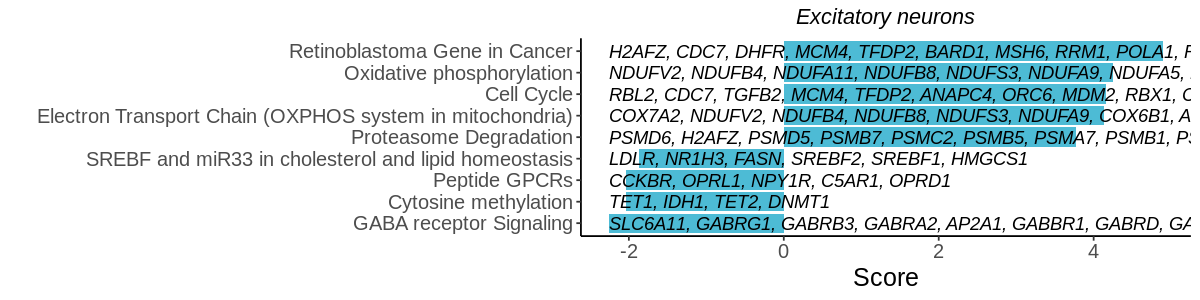

In [20]:
options(repr.plot.width=10, repr.plot.height=2.5)
ex

In [21]:
pdf('./pdf_figures/Figure_2_paths_ex.pdf', width=10, height=2.5)
ex
dev.off()

png 
  2

<u>**Figure 3**</u>
<a name="F3"></a>

In [3]:
# load data
data = readRDS('../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
key = read.csv('../ABCA7lof//raw_data/ngn2_data/lipidkey.csv', sep = '\t')
key = key[!duplicated(key$Key),]
rownames(key) = key$Key

C = unique(key$Class)
class_cols = pal_cosmic()(length(C))
names(class_cols) = C

In [54]:
plot_volcano = function(sce, ratio_name, pval_name, lab, pval_cut, lfc_cut, adjust, annotation1, class_cols){
    cols = c('dodgerblue2', 'grey', 'red')
    names(cols) = c('down', 'other', 'up')
    temp = as.data.frame(rowData(sce)[,c(ratio_name, pval_name, annotation1)])
    colnames(temp) = c('log2', 'pvalue', 'label')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label,'')
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=direction, label = label2))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")
    return(p+xlab('log2(fold change)')+ylab('-log10(p-value)'))
}

In [57]:
# volcano plots
v1a = plot_volcano(data$pm_all[rowData(data$pm_all)$lipid.key%in%c('PC'),], 'stats.log2', 'stats.pvalue', c( 'PC'), 0.1, 0.5, FALSE, 'lipid.key', c('brown1'))
v1b = plot_volcano(data$pm_all[rowData(data$pm_all)$lipid.key%in%c('TG'),], 'stats.log2', 'stats.pvalue', c('TG'), 0.1, 0.5, FALSE, 'lipid.key', c('chocolate'))
v2a = plot_volcano(data$ngn2_all[rowData(data$ngn2_all)$lipid.class%in%c('PC'),], 'logfc_both_batch', 'pvals_both_batch', c('PC'), 0.05, 2, FALSE, 'lipid.class', c('brown1'))
v2b = plot_volcano(data$ngn2_all[rowData(data$ngn2_all)$lipid.class%in%c('TG'),], 'logfc_both_batch', 'pvals_both_batch', c('TG'), 0.05, 2, FALSE, 'lipid.class', c('chocolate'))
v1a = v1a +ggtitle('Phosphatidylcholines\n[ABCA7 LoF / Con]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed')
v1b = v1b +ggtitle('Triglycerides\n[ABCA7 LoF / Con]')+theme(plot.title = element_text(size = 13,  hjust=.5))+geom_vline(xintercept = 0, linetype='dashed')
v2a = v2a +ggtitle('Phosphatidylcholines\n[KO#1 / WT]')+theme(plot.title = element_text(size = 13, hjust=.5))+geom_vline(xintercept = 0, linetype='dashed')
v2b = v2b +ggtitle('Triglycerides\n[KO#1 / WT]')+theme(plot.title = element_text(size = 13, hjust=.5))+geom_vline(xintercept = 0, linetype='dashed')

In [58]:
# plot in PC space
sce = data$ngn2_all
sce = sce[,sce$treatment!='Choline']

pca_res <- prcomp(counts(sce), scale. = TRUE)

temp = as.data.frame(pca_res$rotation)
temp$genotype = colData(sce)[rownames(temp),'Genotype']
temp$treatment = colData(sce)[rownames(temp),'treatment']
temp$genotype = ifelse(temp$genotype=='Control', 'WT', 'KO#1')

pc1 = summary(pca_res)$importance['Proportion of Variance',]['PC1']
pc2 = summary(pca_res)$importance['Proportion of Variance',]['PC2']

p1 = ggplot(temp, aes(x=PC1, y=PC2)) +
  geom_point(aes(fill=genotype), shape=21, size=5, stroke=1) + theme_classic() + 
scale_fill_manual(values = c('blue', 'grey')) + xlab(paste0('PC1: ', round(pc1, 2), '%')) + ylab(paste0('PC2: ', round(pc2, 2), '%'))+ theme(legend.position="top") + ggtitle('ABCA7 LoF lipidomes \n [KO#1 vs WT]')+theme(plot.title = element_text(size = 13,  hjust=.5))


In [106]:
# plot proportions

## figure out the NA values here

meta = rowData(sce)
meta$change = ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch>0, 'up', 
       ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch< 0, 'down', 'unchanged'))


meta$class = key[meta$lipid.class,'Class']
meta$change = factor(meta$change, levels = (c('up', 'down', 'unchanged')))
meta = na.omit(as.data.frame(meta))
x = colSums(table(meta$change, meta$class)[1:2,])

d = as.data.frame(cbind(as.character(unique(meta$class)), c('SL', 'NL', 'PL', 'FA', 'GL')))
rownames(d) = d$V1
meta$class2 = d[meta$class,]$V2
meta$class2 = factor(meta$class2, levels = d[(names(x[order(x)])),]$V2)

p4 = ggplot(meta, aes(x=class2, fill=change), color='black') + scale_fill_manual(values = c( 'red', 'dodgerblue2','white')) + geom_bar(position = "fill", color='black') + theme_classic() + xlab('proportion') + ylab('') + theme(axis.text.y = element_text(size=12),axis.text.x=element_text(angle=0, hjust=1))+ theme(legend.position="top")

meta = meta[meta$class%in%c('Neutral lipids', 'Phospholipids', 'Sphingolipids'),]
x = colSums(table(meta$change, meta$lipid.class)[1:2,])
meta$lipid.class = factor(meta$lipid.class, levels = (names(x[order(x)])))

p5 = ggplot(meta, aes(x=lipid.class, fill=change), color='black') + scale_fill_manual(values = c('red', 'dodgerblue2', 'white')) + geom_bar(position = "fill", color='black') + theme_classic() + ylab('proportion') + xlab('') +  facet_grid(. ~ class, scales="free", space="free")+ theme(axis.text.x=element_text(angle=45, hjust=1))+ theme(legend.position = "none")


In [108]:
# plot proportions
meta = rowData(sce)
meta$change = ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch>0, 'up', 
       ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch<0, 'down', 'unchanged'))


meta$class = key[meta$lipid.class,'Class']
meta$change = factor(meta$change, levels = (c('up', 'down', 'unchanged')))

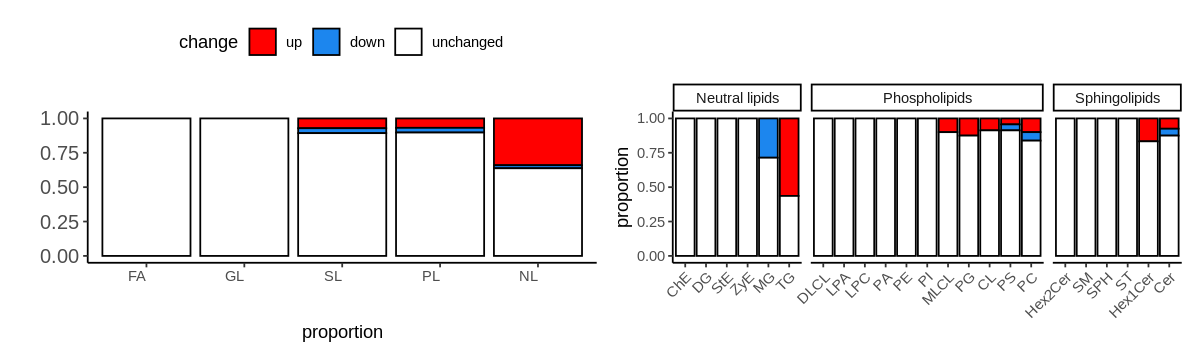

In [109]:
options(repr.plot.width=10, repr.plot.height=3)

p4 + p5

In [110]:
# plot table
tbl = as.data.frame(table(meta$lipid.class, meta$change))
tbl = as.data.frame(tbl%>%pivot_wider(values_from=Freq, names_from=Var2))
tbl$total = rowSums(cbind(tbl$up, tbl$down))
tbl$total = rowSums(cbind(tbl$up, tbl$down))
tbl = tbl[order(tbl$total, decreasing=TRUE),]
tbl$percentage = round(tbl$total/(tbl$total+tbl$unchanged), 2)*100
tbl = as.data.frame(tbl)
rownames(tbl) = tbl$Var1
tbl$Var1 = NULL
tbl = tbl[, c('up', 'down', 'total', 'percentage')]
colnames(tbl) = c('U', 'D', 'T', '%')
tbl$Name = key[rownames(tbl),c('subclass')]
tbl = tbl[tbl$T!=0,]
p6 = gridExtra::tableGrob(tbl)


In [111]:
tbl

,U,D,T,%,Name
,<int>,<int>,<dbl>,<dbl>,<chr>
TG,31,0,31,56,triglyceride
PC,13,8,21,16,phosphatidylcholine
Cer,8,2,10,22,Ceramides
CL,2,0,2,9,Cardiolipin
MG,0,2,2,29,monoglyceride
PS,1,1,2,9,phosphatidylserine
Hex1Cer,1,0,1,12,Simple Glc series
MLCL,1,0,1,10,Cardiolipin
PG,1,0,1,12,phosphatidylglycerol


In [11]:
# plot lipid-specific paths
data = readRDS('./processed_data/for_plotting/fgsea_out_ex_lipid.rds')
data = data[data$pval<0.025,]
#data = data[3:nrow(data),]
data$pathway = unlist(lapply(data$pathway, function(i) strsplit(i, '[(]|WP|R-HSA')[[1]][1]))
data$score = sign(data$NES)*-log10(data$pval)
data$genes = unlist(lapply(data$leadingEdge, function(x) paste0(x, collapse=', ')))
data = data[unlist(lapply(data$leadingEdge, function(x) length(x)))>1,]
data$pathway = factor(data$pathway, levels=data$pathway[order(data$score,decreasing=FALSE)])


In [12]:
P = ggplot(data=data, aes(x=score, y=pathway))+
  geom_bar(stat="identity", fill=colors['Ex']) +theme_classic()+
geom_text(aes(label = genes,x=-2.5, hjust = 0, fontface="italic"),color='black')+
theme(legend.position = "bottom", strip.text.x = element_blank() )+
ggtitle('') + ylab('') + ggtitle('Perturbed Lipid Pathways in Ex')+ theme(text = element_text(size = 15))        + xlab('Score')+theme(plot.title = element_text(size = 13, face = "italic", hjust=.5))#+xlim(-2,4)

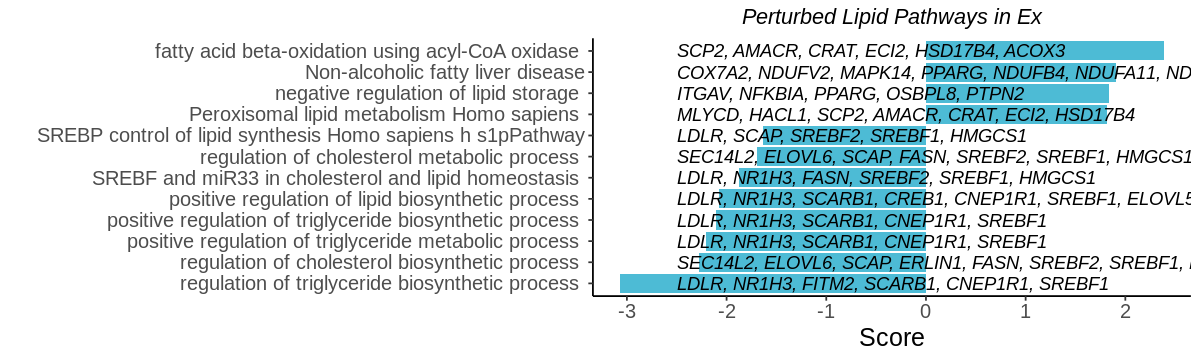

In [15]:
options(repr.plot.width=10, repr.plot.height=3)

P

In [14]:
pdf('./pdf_figures/Figure_3_paths_ex.pdf', width=10, height=2.5)
P
dev.off()

png 
  2